In [83]:
import numpy as np

In [84]:
def on_board(p):
    r, c = p
    if 0 <= r < 5 and 0 <= c < 5:
        return True
    return False

def enumerate_moves(p):
    r, c = p
    m = [
        (r+3, c),
        (r-3, c),
        (r, c+3),
        (r, c-3),
        (r+2, c+2),
        (r+2, c-2),
        (r-2, c+2),
        (r-2, c-2)
    ]
    return [x for x in m if on_board(x)]

def board_to_key(board):
    return tuple(board.flatten().tolist())

def dfs(board, state_set, p, path, best_sol):
    board_key = board_to_key(board)
    if board_key in state_set:
        return
    state_set.add(board_key)
    if len(path) > len(best_sol):
        best_sol.clear()
        best_sol.extend(path)
    moves = enumerate_moves(p)
    for move in moves:
        r,c = move
        if board[r][c]:
            continue
        board[r][c] = True
        path.append(move)
        dfs(board, state_set, move, path, best_sol)
        path.pop()
        board[r][c] = False

In [87]:
import matplotlib.pyplot as plt
import os
def save_board(board, fname, last_move):
    filled, empty = [], []
    for r in range(0,5):
        for c in range(0,5):
            if board[r][c]:
                filled.append((r,c))
            else:
                empty.append((r,c))
    plt.cla()
    plt.scatter([x[1] for x in filled], [x[0] for x in filled], color="blue")
    plt.scatter([x[1] for x in empty], [x[0] for x in empty], color="orange")
    plt.scatter([last_move[1]], [last_move[0]], color="green")
    plt.savefig(fname)
    
def plot_path(path):
    board = np.zeros((5,5), dtype=np.bool)
    if not os.path.exists("riddler_boards"):
        os.mkdir("riddler_boards")
    folder = "riddler_boards/%s_%s" % (path[0][0], path[0][1])
    if not os.path.exists(folder):
        os.mkdir(folder)
    for i, move in enumerate(path):
        r,c = move
        board[r][c] = True
        fname = os.path.join(folder, "%02d.png" % i)
        save_board(board, fname, move)
            
            
    

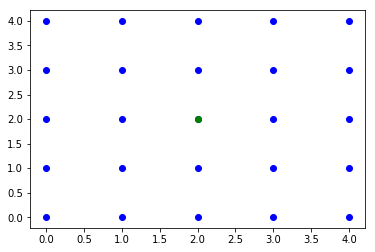

In [88]:
for r in range(0,5):
    for c in range(0,5):
        board = np.zeros((5,5), dtype=np.bool)
        board[r][c] = True
        p = (r,c)
        path = [p]
        best_sol = []
        dfs(board, set(), p, path, best_sol)
        plot_path(best_sol)

In [82]:
import delegator
if os.path.exists("gifs"):
    os.mkdir("gifs")
for r in range(0,5):
    for c in range(0,5):
        out_name = "gifs/%d_%d.gif" % (r,c)
        in_names = "riddler_boards/%s_%s/*.png" % (r,c)
        cmd = "convert -delay 100 -loop 0 %s %s" % (in_names, out_name)
        print(cmd)
        result = delegator.run(cmd)
        print(result.out)
        print(result.err)

convert -delay 100 -loop 0 riddler_boards/0_0/*.png gifs/0_0.gif


convert -delay 100 -loop 0 riddler_boards/0_1/*.png gifs/0_1.gif


convert -delay 100 -loop 0 riddler_boards/0_2/*.png gifs/0_2.gif


convert -delay 100 -loop 0 riddler_boards/0_3/*.png gifs/0_3.gif


convert -delay 100 -loop 0 riddler_boards/0_4/*.png gifs/0_4.gif


convert -delay 100 -loop 0 riddler_boards/1_0/*.png gifs/1_0.gif


convert -delay 100 -loop 0 riddler_boards/1_1/*.png gifs/1_1.gif


convert -delay 100 -loop 0 riddler_boards/1_2/*.png gifs/1_2.gif


convert -delay 100 -loop 0 riddler_boards/1_3/*.png gifs/1_3.gif


convert -delay 100 -loop 0 riddler_boards/1_4/*.png gifs/1_4.gif


convert -delay 100 -loop 0 riddler_boards/2_0/*.png gifs/2_0.gif


convert -delay 100 -loop 0 riddler_boards/2_1/*.png gifs/2_1.gif


convert -delay 100 -loop 0 riddler_boards/2_2/*.png gifs/2_2.gif


convert -delay 100 -loop 0 riddler_boards/2_3/*.png gifs/2_3.gif


convert -delay 100 -loop 0 riddler_boards/2_4/*.png gifs/2_4.g

In [80]:
pwd

'/home/leswing/Documents/riddler/07_27_18'